In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, accuracy_score

In [2]:
curve = np.load("Precision_Recall_Curve.npy", allow_pickle = True).item()
print(curve)

{'Precision': array([0.30703606, 0.30703487, 0.30703676, ..., 1.        , 1.        ,
       1.        ]), 'Recall': array([1.00000000e+00, 9.99989980e-01, 9.99989980e-01, ...,
       4.00805619e-05, 1.00201405e-05, 0.00000000e+00]), 'Thresholds': array([7.9191268e-05, 7.9191421e-05, 7.9191566e-05, ..., 9.9999940e-01,
       9.9999952e-01, 9.9999976e-01], dtype=float32)}


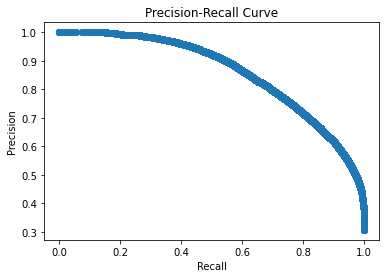

In [3]:
plt.figure()
plt.scatter(curve['Recall'], curve['Precision'])
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision');

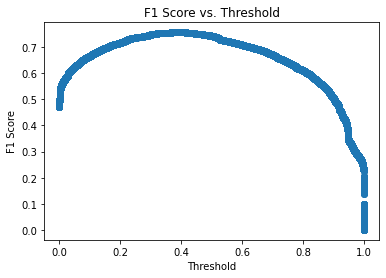

In [4]:
f1_scores = 2  / (1 / curve['Recall'][:-1] + 1 / curve['Precision'][:-1])

plt.figure()
plt.scatter(curve['Thresholds'], f1_scores)
plt.title('F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score');

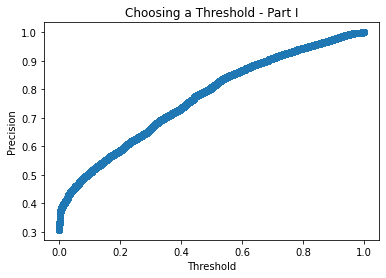

In [5]:
plt.figure()
plt.scatter(curve['Thresholds'], curve['Precision'][:-1])
plt.title('Choosing a Threshold - Part I')
plt.xlabel('Threshold')
plt.ylabel('Precision');

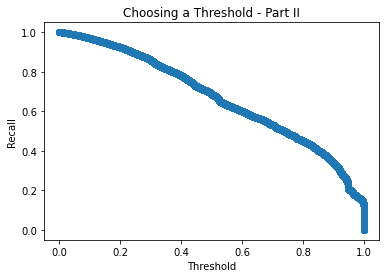

In [6]:
plt.figure()
plt.scatter(curve['Thresholds'], curve['Recall'][:-1])
plt.title('Choosing a Threshold - Part II')
plt.xlabel('Threshold')
plt.ylabel('Recall');

In [7]:
curve['Thresholds'][np.argmax(f1_scores)]

0.41002643

In [8]:
predicted = np.load("Predictions.npy", allow_pickle = True)
actual = np.load("Actual.npy", allow_pickle = True)
print(predicted[0], actual[0])

[9.9963456e-01 3.3025146e-03 1.7594315e-08 1.7594315e-08 1.7594315e-08
 1.7594315e-08 1.7594315e-08 1.7594315e-08 1.7594315e-08 1.7594315e-08
 1.7594315e-08 1.7594315e-08 1.7594315e-08 1.7594315e-08 1.7594315e-08
 1.7594315e-08 1.7594315e-08 1.7594315e-08 1.7594315e-08 1.7594315e-08
 1.7594315e-08 1.7594315e-08 1.7594315e-08 1.7594315e-08 1.7594315e-08
 1.7594315e-08 1.7594315e-08 1.7594315e-08 1.7594315e-08 1.7594315e-08] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [9]:
compton = np.load("Compton.npy", allow_pickle = True)
print(compton[0])

[0. 0.]


In [10]:
types = np.load("Types.npy", allow_pickle = True)
print(types[0])

[b'gg' b'J\xdf\xe8?']


In [11]:
filt_pred = []
filt_act = []

for i in range(len(predicted)):
    mask = compton[i].astype(int)
    mask = np.pad(mask, [(0, len(predicted[i]) - len(mask))], mode = 'constant').astype(bool)
    filt_pred.append(predicted[i][mask])
    filt_act.append(actual[i][mask])

print(filt_pred[0], filt_act[0])

[] []


In [12]:
filt_type = []

for i in range(len(predicted)):
    mask = compton[i].astype(int).astype(bool)
    filt_type.append(types[i][mask])

print(filt_type[0])

[]


In [13]:
print(set([len(typ) for typ in filt_type]))

{0}


In [14]:
# new_precisions, new_recalls, new_thresholds = precision_recall_curve(np.hstack(np.array(filt_act)), 
#                                                                      np.hstack(np.array(filt_pred)))

In [15]:
# plt.figure()
# plt.scatter(new_thresholds, new_recalls[:-1])
# plt.title('Choosing a Threshold - Intial Tracks')
# plt.xlabel('Threshold')
# plt.ylabel('Recall');

In [16]:
unpad_pred = []
unpad_act = []
mean_acc = 0

for i in range(len(predicted)):
    orig_pred = predicted[i][:len(compton[i])]
    orig_act = actual[i][:len(compton[i])]
    unpad_pred.append(orig_pred)
    unpad_act.append(orig_act)
    mean_acc += accuracy_score(orig_pred >= 0.5, orig_act.astype(int))

print(mean_acc / len(predicted))

0.9046580625682428


In [17]:
compare_pred = [1.0 * (unpad >= 0.4) for unpad in unpad_pred]
print(compare_pred[0], unpad_act[0])

[1. 0.] [1. 0.]


In [29]:
# lengths = [len(pair[0]) for pair in zip(compare_pred, unpad_act)]
# accuracies = [accuracy_score(*pair) for pair in zip(compare_pred, np.array(unpad_act))]
# print(np.mean(accuracies))

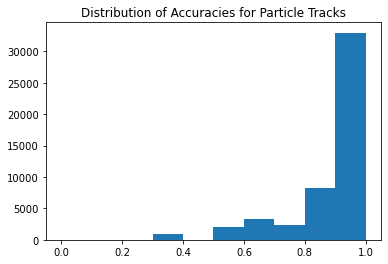

In [19]:
plt.hist(accuracies)
plt.title('Distribution of Accuracies for Particle Tracks');

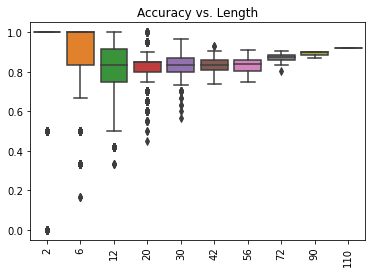

In [20]:
sns.boxplot(x = lengths, y = accuracies)
plt.title('Accuracy vs. Length')
plt.xticks(rotation = 90);

In [21]:
def calc_rates(predicted, actual):
    
    TP = FP = TN = FN = 0

    for i in range(len(predicted)): 
        pred, act = predicted[i], actual[i]
        
        for j in range(len(pred)):
            if act[j] == pred[j] == 1:
                TP += 1
            if pred[j] == 1 and act[j] != pred[j]:
                FP += 1
            if act[j] == pred[j] == 0:
                TN += 1
            if pred[j] == 0 and act[j] != pred[j]:
                FN += 1
    if TP + FN != 0:
        return TP / (TP + FN), FN / (TP + FN)
    else:
        return -1

In [22]:
calc_rates(compare_pred, unpad_act)

(0.7816911993106144, 0.21830880068938566)

In [23]:
recalls = [calc_rates([pair[0]], [pair[1]]) for pair in zip(compare_pred, unpad_act)]
boole = [r != -1 for r in recalls]
recalls = [r[0] for r in recalls if r != -1]
print(np.mean(recalls))

0.8523614608770858


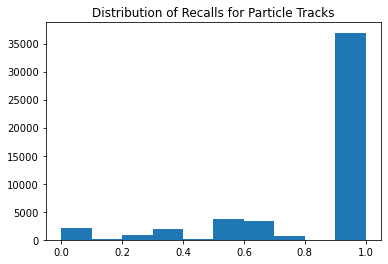

In [24]:
plt.hist(recalls)
plt.title('Distribution of Recalls for Particle Tracks');

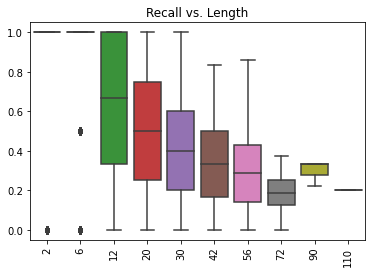

In [25]:
sns.boxplot(x = np.array(lengths)[boole], y = recalls)
plt.title('Recall vs. Length')
plt.xticks(rotation = 90);

In [26]:
failure_modes = []
for i in range(5):
    new_pred = [[comp[i]] if len(comp) >= i + 1 else None for comp in compare_pred]
    new_act = [[act[i]] if len(act) >= i + 1 else None for act in unpad_act] 
    new_pred = [p for p in new_pred if p is not None]
    new_act = [a for a in new_act if a is not None]
    new_accuracy = np.mean([accuracy_score(*pair) for pair in zip(new_pred, new_act)])
    new_recall = calc_rates(new_pred, new_act)[0]
    failure_modes.append([new_accuracy, new_recall])

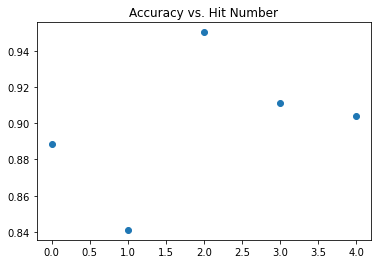

In [27]:
plt.title('Accuracy vs. Hit Number')
plt.scatter(range(5), np.array(failure_modes)[:, 0]);

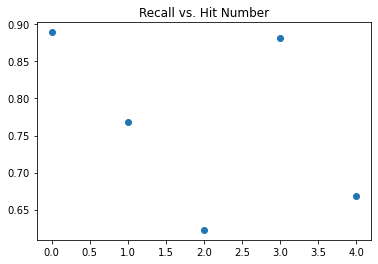

In [28]:
plt.title('Recall vs. Hit Number')
plt.scatter(range(5), np.array(failure_modes)[:, 1]);